# TPC7

<b> Identificador: </b> Tpc7                                       <b> Título: </b> Processamento de Datasets

<b> Data início: </b> 2021-11-28                                   <b> Data fim: </b> 2021-11-28

<b> Supervisor: </b> José Carlos Ramalho:https://www.di.uminho.pt/~jcr/  <b> Autor: </b> Mariana Barbosa Ribeiro, a94964


### Resumo

O trabalho de casa surge como conclusão do guião da aula prática. Para este trabalho era proposto a realização de 4 funções: consultar data set, distribuição por médias e representação gráfica da distribuição por médias e por curso.

### Código 

** DISTRIBUIÇÃO POR MÉDIA **
 A distribuição por médias:   {11: 9, 16: 11, 12: 15, 15: 15, 14: 21, 13: 20, 17: 4, 18: 2, 9: 2, 10: 1}


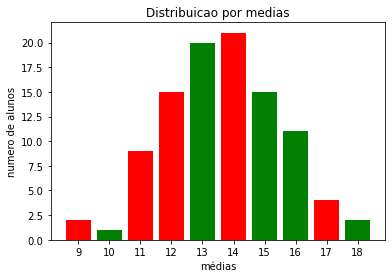

** DISTRIBUIÇÃO POR CURSO **
A distribuição por cursos:   {'LEI': 23, 'ENGFIS': 32, 'LCC': 20, 'ENGBIOM': 25}
['LEI' 'ENGFIS' 'LCC' 'ENGBIOM']
** CONSULTAR DATA SET ** 
a6|Eryk Clementino|LEI|13.5
** TOP 10 **
a80|Maria Carolina Josué|ENGFIS|18.0
a47|Moisés João Cornelio|LEI|18.0
a74|Vânia Sofia Porfirio|ENGBIOM|17.5
a32|Ariane Sofia Foja|LEI|17.5
a56|Hakeem Brazão|LEI|17.25
a84|Laudário Frasão|LCC|17.0
a45|Imayame Hespanha|ENGFIS|16.75
a41|Lachezar Rosas|ENGBIOM|16.75
a13|Daniela Patrícia Montes|ENGBIOM|16.75


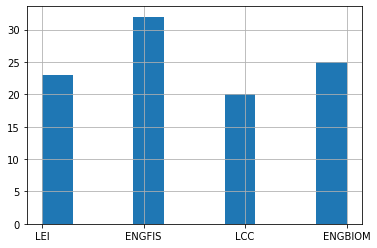

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def getAluno(texto):
    textoLimpo=texto.replace("\"", "")
    campos=textoLimpo.split(",")
    aluno=[]
    aluno.append(campos[0])
    aluno.append(campos[1])
    aluno.append(campos[2])
    aluno.append(campos[3:])
    lista=[]
    for s in aluno[3]:
        lista.append(int(s))
    aluno[3]=lista
    return aluno 
      
def lerDataset(fnome):
    f=open(fnome, encoding="utf-8")
    bd=[]
    f.readline()
    
    for linha in f:
        bd.append(getAluno(linha))
    return bd

def chaveOrd(a):
    return a[1]

def listarDataset(bd):
    bd.sort(key=chaveOrd)
    print("id     nome     curso     media")
    print("_______________________________")
    for a in bd:
        print(a[0]+ "|" +a[1]+"|"+a[2]+"|"+ str(sum(a[3])/4))
        
def consultarDataset(bd, id):
    encontrado=False
    i=0
    while encontrado==False and i<(len(bd)):
        if bd[i][0]==id:
            print(bd[i][0]+ "|" + bd[i][1]+"|"+ bd[i][2]+"|"+ str(sum(bd[i][3])/4))
            encontrado =True
            i=i+1
        else:    
            encontrado=False
            i=i+1
    return encontrado

def chaveOrd2(a):
    return (sum(a[3])/4)

def top10(bd):
    bd.sort(key=chaveOrd2)
    bd.reverse()
    bdtop=[]
    for i in range (9):
        bdtop.append(bd[i])
    for i in range (len(bdtop)):
        print(bd[i][0]+ "|" +bd[i][1]+"|"+bd[i][2]+"|"+ str(sum(bd[i][3])/4))
        bdtop[i][3]=(sum(bd[i][3])/4)
    return bdtop

def distribPorCurso(bd):
    distribuicao={}
    for a in bd: 
        if a[2] in distribuicao.keys():
            distribuicao[a[2]]=distribuicao[a[2]] +1
        else:
            distribuicao[a[2]]=1
    return distribuicao  

def distribPorMedia(bd):
    distribuicaomed={}
    for a in bd:
        media=int(sum(a[3])/4)
        if media in distribuicaomed.keys():
            distribuicaomed[media]=distribuicaomed[media] + 1
        else:
            distribuicaomed[media]=1
    return distribuicaomed

def plotDistribPorCurso():
    bd = pd.read_csv("alunos.csv")
    cursos = bd["curso"].unique()
    print(cursos)
    cont = bd["curso"].hist().plot(kind='bar')


def getList(dict):
    return dict.keys()

def convertstr(listaint):
    l=[]
    for i in listaint:
        l.append(str(i))
    return l

def plotDistribPorMedia(distribuicaomed):
    # x-coordinates of left sides of bars
    left =getList(distribuicaomed)
    # heights of bars
    valores = distribuicaomed.values() 
    listadevalores = list(valores)
    height = listadevalores
 
    # labels for bars
    tick_label = convertstr(left)
 
    # plotting a bar chart
    plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
 
    # naming the x-axis
    plt.xlabel('médias')
    # naming the y-axis
    plt.ylabel('numero de alunos')
    # plot title
    plt.title('Distribuicao por medias')
 
    # function to show the plot
    plt.show()

bd=[]
bd=lerDataset("alunos.csv")

print("** DISTRIBUIÇÃO POR MÉDIA **")
distribuicaomed=distribPorMedia(bd) 
print(" A distribuição por médias:  ", distribuicaomed)
plotDistribPorMedia(distribuicaomed)

print("** DISTRIBUIÇÃO POR CURSO **")
distribuicaocur=distribPorCurso(bd)
print("A distribuição por cursos:  ", distribuicaocur)
plotDistribPorCurso()

print("** CONSULTAR DATA SET ** ")
consultarDataset(bd, "a6")

print("** TOP 10 **")
top=top10(bd)